## lets start Data analysis on world covid dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#read dataset
data = pd.read_excel("WorldCovidData.xlsx")
data.head(10)

,FIPS,County,Province/State,Country,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,...,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,life_expectancy,state_code
0,NaN,NaN,Anhui,China,01-22-2020,NaN,NaN,1,0,0,...,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91,NaN
1,NaN,NaN,Beijing,China,01-22-2020,NaN,NaN,14,0,0,...,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91,NaN
2,NaN,NaN,Chongqing,China,01-22-2020,NaN,NaN,6,0,0,...,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91,NaN
3,NaN,NaN,Fujian,China,01-22-2020,NaN,NaN,1,0,0,...,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91,NaN
4,NaN,NaN,Gansu,China,01-22-2020,NaN,NaN,0,0,0,...,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91,NaN
5,NaN,NaN,Guangdong,China,01-22-2020,NaN,NaN,26,0,0,...,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91,NaN
6,NaN,NaN,Guangxi,China,01-22-2020,NaN,NaN,2,0,0,...,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91,NaN
7,NaN,NaN,Guizhou,China,01-22-2020,NaN,NaN,1,0,0,...,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91,NaN
8,NaN,NaN,Hainan,China,01-22-2020,NaN,NaN,4,0,0,...,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91,NaN
9,NaN,NaN,Hebei,China,01-22-2020,NaN,NaN,1,0,0,...,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91,NaN


### let's understand each column in the provided dataset:

1. FIPS: Federal Information Processing Standards code, a unique identifier for each geographic region in the United States.
2. County: Name of the county within the specified geographic region.
3. Province/State: Name of the province or state.
4. Country: Name of the country.
5. Last_Update: Date when the data was last updated.
6. Latitude: Geographic latitude coordinate.
7. Longitude: Geographic longitude coordinate.
8. Confirmed: Number of confirmed COVID-19 cases.
9. Deaths: Number of deaths due to COVID-19.
10. Recovered: Number of individuals who have recovered from COVID-19.

**... (and other columns): Additional columns with various COVID-19 related metrics and demographic information.**

1. Population: Total population of the specified region.
2. Population_Density: Population density, often measured as the number of people per square kilometer.
3. Median_Age: Median age of the population.
4. Aged_65_Older: Percentage of the population aged 65 and older.
5. Aged_70_Older: Percentage of the population aged 70 and older.
6. GDP_Per_Capita: Gross Domestic Product (GDP) per capita, a measure of economic output per person.
7. Extreme_Poverty: Percentage of the population living in extreme poverty.
8. Hospital_Beds_Per_Thousand: Number of hospital beds per thousand people.
9. Life_Expectancy: Average number of years a person can expect to live.
10. State_Code: Code representing the state within a country.

The dataset contains information related to COVID-19 cases, demographic factors, and economic indicators for different regions. It appears to be a comprehensive dataset for analysis and exploration of the impact of COVID-19 across various geographical areas and demographic conditions.

In [3]:
data.shape

(547376, 21)

In [4]:
data.columns

Index(['FIPS', 'County', 'Province/State', 'Country', 'Last_Update',
       'Latitude', 'Longitude', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'hospital_beds_per_thousand', 'life_expectancy', 'state_code'],
      dtype='object')

In [5]:
data.describe()

,FIPS,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,life_expectancy
count,461946.000000,534500.000000,534500.000000,547376.000000,547376.000000,5.473760e+05,5.472130e+05,5.451240e+05,544464.000000,543937.000000,543432.000000,543768.000000,543741.000000,526453.000000,542173.000000,544952.000000
mean,31517.451445,36.215581,-75.166509,2420.193843,112.276200,1.277469e+03,1.002039e+03,3.159755e+08,61.380659,37.956537,14.998774,9.498865,49826.309309,1.716403,2.962843,78.487655
std,17219.825279,12.014797,49.547796,15674.450409,1036.116422,1.784566e+04,1.891992e+04,1.753392e+08,393.675846,3.230555,2.764641,1.935516,12391.906282,4.444562,1.330250,2.568494
min,66.000000,-52.368000,-174.159600,0.000000,0.000000,0.000000e+00,-2.477656e+06,3.369100e+04,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,0.100000,53.280000
25%,18171.000000,33.601926,-96.277369,11.000000,0.000000,0.000000e+00,6.000000e+00,3.310026e+08,35.608000,38.300000,15.413000,9.732000,54225.446000,1.200000,2.770000,78.860000
50%,29199.000000,37.924657,-87.310695,71.000000,1.000000,0.000000e+00,5.300000e+01,3.310026e+08,35.608000,38.300000,15.413000,9.732000,54225.446000,1.200000,2.770000,78.860000
75%,46083.000000,41.841448,-79.350841,441.000000,11.000000,0.000000e+00,3.330000e+02,3.310026e+08,35.608000,38.300000,15.413000,9.732000,54225.446000,1.200000,2.770000,78.860000
max,99999.000000,72.000000,178.065000,735960.000000,42072.000000,1.965056e+06,2.669120e+05,1.439324e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,13.800000,86.750000


In [6]:
# Check for missing values
print(data.isnull().sum())

FIPS                          85430
County                        84477
Province/State                29812
Country                           0
Last_Update                       0
Latitude                      12876
Longitude                     12876
Confirmed                         0
Deaths                            0
Recovered                         0
Active                          163
population                     2252
population_density             2912
median_age                     3439
aged_65_older                  3944
aged_70_older                  3608
gdp_per_capita                 3635
extreme_poverty               20923
hospital_beds_per_thousand     5203
life_expectancy                2424
state_code                    86807
dtype: int64


In [7]:
data['County'].fillna('Unknown', inplace=True)
data['Province/State'].fillna('Unknown', inplace=True)


In [8]:
data['Latitude'].fillna(data['Latitude'].mean(), inplace=True)
data['Longitude'].fillna(data['Longitude'].mean(), inplace=True)


In [9]:
numerical_columns = ['population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
                      'gdp_per_capita', 'hospital_beds_per_thousand', 'life_expectancy']

for column in numerical_columns:
    data[column].fillna(data[column].mean(), inplace=True)


In [10]:
data['extreme_poverty'].fillna(data['extreme_poverty'].mean(), inplace=True)


#the missing values in 'State Code' are too substantial, you might consider dropping this column.
data.drop('state_code', axis=1, inplace=True)


In [11]:
# Explore unique values in categorical columns
print(data['Country'].unique())
print(data['Last_Update'].unique())

['China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'United Kingdom' 'Russia' 'Sweden' 'Spain' 'Belgium'
 'Others' 'Egypt' 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan'
 'Bahrain' 'Kuwait' 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan'
 'Georgia' 'Greece' 'North Macedonia' 'Norway' 'Romania' 'Denmark'
 'Estonia' 'Netherlands' 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland'
 'Lithuania' 'New Zealand' 'Nigeria' 'North Ireland' 'Ireland'
 'Luxembourg' 'Monaco' 'Qatar' 'Ecuador' 'Azerbaijan' 'Czech Republic'
 'Armenia' 'Dominican Republic' 'Indonesia' 'Portugal' 'Andorra' 'Latvia'
 'Morocco' 'Saudi Arabia' 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine'
 'Saint Barthelemy' 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein'
 'Poland' 'Tun

In [12]:
print(f' Is there any duplicate in the Daily DataFrame? {data.duplicated().values.any()}.')

 Is there any duplicate in the Daily DataFrame? False.


In [13]:
# Replace NaN values with the mean
mean_population = data['population'].mean()
data['population'].fillna(mean_population, inplace=True)

# Format the 'Population' column
data['population'] = data['population'].apply(lambda x: f'{int(x):,}')

# Display the updated DataFrame
data.head(10)



,FIPS,County,Province/State,Country,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,life_expectancy
0,NaN,Unknown,Anhui,China,01-22-2020,36.215581,-75.166509,1,0,0,1.0,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
1,NaN,Unknown,Beijing,China,01-22-2020,36.215581,-75.166509,14,0,0,14.0,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
2,NaN,Unknown,Chongqing,China,01-22-2020,36.215581,-75.166509,6,0,0,6.0,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
3,NaN,Unknown,Fujian,China,01-22-2020,36.215581,-75.166509,1,0,0,1.0,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
4,NaN,Unknown,Gansu,China,01-22-2020,36.215581,-75.166509,0,0,0,0.0,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
5,NaN,Unknown,Guangdong,China,01-22-2020,36.215581,-75.166509,26,0,0,26.0,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
6,NaN,Unknown,Guangxi,China,01-22-2020,36.215581,-75.166509,2,0,0,2.0,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
7,NaN,Unknown,Guizhou,China,01-22-2020,36.215581,-75.166509,1,0,0,1.0,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
8,NaN,Unknown,Hainan,China,01-22-2020,36.215581,-75.166509,4,0,0,4.0,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
9,NaN,Unknown,Hebei,China,01-22-2020,36.215581,-75.166509,1,0,0,1.0,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91


In [14]:
# Create Part 1: Demographic and Economic Information
demographic_columns = ['population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
                        'extreme_poverty', 'hospital_beds_per_thousand', 'life_expectancy']
part1_df = data[demographic_columns]

# Create Part 2: COVID-19 Information
covid_columns = ['FIPS', 'County', 'Province/State', 'Country', 'Last_Update', 'Latitude', 'Longitude', 'Confirmed', 'Deaths',
                  'Recovered']
part2_df = data[covid_columns]

# Display the first few rows of each part
print("Part 1: Demographic and Economic Information")
print(part1_df.head())

print("\nPart 2: COVID-19 Information")
print(part2_df.head())


Part 1: Demographic and Economic Information
      population  population_density  median_age  aged_65_older  \
0  1,439,323,774             147.674        38.7         10.641   
1  1,439,323,774             147.674        38.7         10.641   
2  1,439,323,774             147.674        38.7         10.641   
3  1,439,323,774             147.674        38.7         10.641   
4  1,439,323,774             147.674        38.7         10.641   

   aged_70_older  gdp_per_capita  extreme_poverty  hospital_beds_per_thousand  \
0          5.929       15308.712              0.7                        4.34   
1          5.929       15308.712              0.7                        4.34   
2          5.929       15308.712              0.7                        4.34   
3          5.929       15308.712              0.7                        4.34   
4          5.929       15308.712              0.7                        4.34   

   life_expectancy  
0            76.91  
1            76.91  
2 

In [15]:
#Cases by country
cases_by_country = data.groupby('Country')[[
    'population', 
    'Confirmed',
    'Deaths',
    'Recovered',
    'Active'
]].sum()
cases_by_country.head(25)

,population,Confirmed,Deaths,Recovered,Active
Country,,,,,
Azerbaijan,"315,975,503",1,0,0,1.0
Afghanistan,"38,928,34138,928,34138,928,34138,928,34138,928...",2864568,82240,1456021,1326307.0
Albania,"2,877,8002,877,8002,877,8002,877,8002,877,8002...",358112,10615,203446,144051.0
Algeria,"43,851,04343,851,04343,851,04343,851,04343,851...",2054827,110484,1361942,582401.0
Andorra,"77,26577,26577,26577,26577,26577,26577,26577,2...",118504,6733,90067,21704.0
Angola,"32,866,26832,866,26832,866,26832,866,26832,866...",62300,2875,20254,39171.0
Antigua and Barbuda,"97,92897,92897,92897,92897,92897,92897,92897,9...",6787,401,4530,1856.0
Argentina,"45,195,77745,195,77745,195,77745,195,77745,195...",10664462,216782,5304238,5143442.0
Armenia,"2,963,2342,963,2342,963,2342,963,2342,963,2342...",2593460,46755,1661321,885384.0


**The provided code performs the following operations:**

1. Grouping by Country: Using the groupby method, the dataset data is grouped by the 'Country' column.

2. Aggregation: Within each country group, the following columns are selected for aggregation: 'population', 'Confirmed', 'Deaths', 'Recovered', and 'Active'. These columns represent various COVID-19 metrics.

3. Summation: The sum() function is applied to aggregate the selected columns, resulting in the total population, confirmed cases, deaths, recoveries, and active cases for each country.

4. Displaying the Top 25 Rows: The head(25) method is used to display the aggregated data for the top 25 countries based on the specified COVID-19 metrics.

This code is implemented to provide a consolidated view of COVID-19 metrics, specifically focusing on population, confirmed cases, deaths, recoveries, and active cases, for each country. The aggregation helps in understanding the overall impact of the pandemic on a country-by-country basis. The top 25 countries are displayed to offer a concise overview.

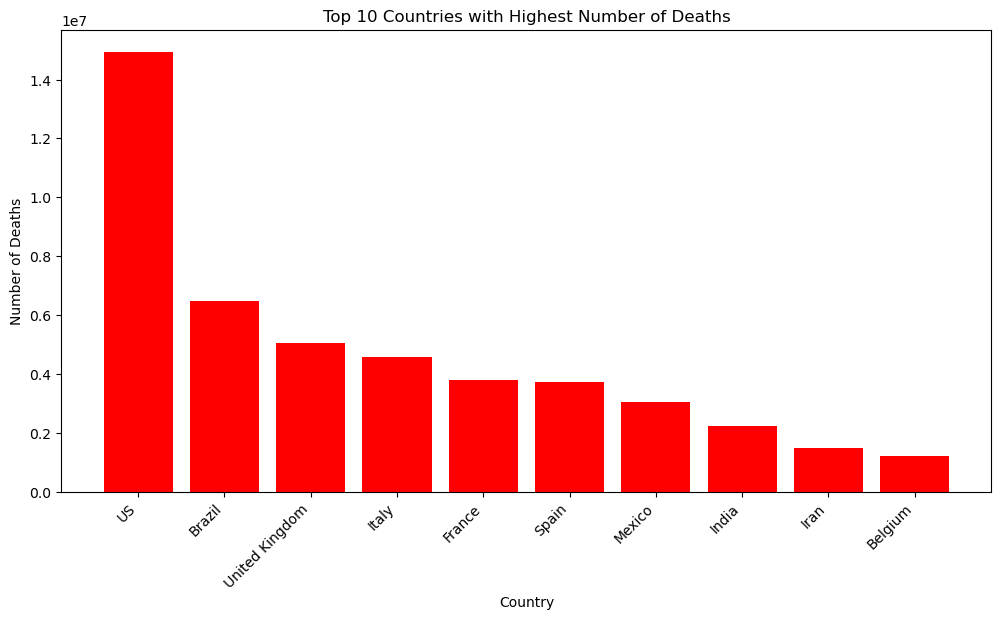

In [26]:
# Sort the countries by the number of deaths in descending order
top_death_countries = cases_by_country.sort_values(by='Deaths', ascending=False).head(10)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_death_countries.index, top_death_countries['Deaths'], color='red')
plt.title('Top 10 Countries with Highest Number of Deaths')
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()


**This code snippet performs the following actions:**

1. Sorting by Deaths: The cases_by_country DataFrame, which contains aggregated COVID-19 metrics for each country, is sorted in descending order based on the 'Deaths' column using sort_values.

2. Selecting Top 10 Countries: The head(10) method is then applied to extract the top 10 countries with the highest number of deaths.

3. Plotting a Bar Graph: Using Matplotlib, a bar graph is plotted with countries on the x-axis and the corresponding number of deaths on the y-axis. The bars are colored red for better visibility.

4. Adjusting Aesthetics: The title, x-axis label, and y-axis label are set to provide context to the graph. Additionally, x-axis labels are rotated for better readability.

This code visually represents the top 10 countries with the highest number of deaths in the COVID-19 dataset. If, after plotting the graph, the United States is found to have the highest number of deaths, it indicates that the U.S. experienced a significant impact from the pandemic, at least in terms of reported deaths.

In [16]:
part1_df.head(10)

,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,life_expectancy
0,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
1,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
2,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
3,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
4,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
5,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
6,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
7,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
8,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91
9,"1,439,323,774",147.674,38.7,10.641,5.929,15308.712,0.7,4.34,76.91


In [17]:
part2_df.head(10)

,FIPS,County,Province/State,Country,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered
0,NaN,Unknown,Anhui,China,01-22-2020,36.215581,-75.166509,1,0,0
1,NaN,Unknown,Beijing,China,01-22-2020,36.215581,-75.166509,14,0,0
2,NaN,Unknown,Chongqing,China,01-22-2020,36.215581,-75.166509,6,0,0
3,NaN,Unknown,Fujian,China,01-22-2020,36.215581,-75.166509,1,0,0
4,NaN,Unknown,Gansu,China,01-22-2020,36.215581,-75.166509,0,0,0
5,NaN,Unknown,Guangdong,China,01-22-2020,36.215581,-75.166509,26,0,0
6,NaN,Unknown,Guangxi,China,01-22-2020,36.215581,-75.166509,2,0,0
7,NaN,Unknown,Guizhou,China,01-22-2020,36.215581,-75.166509,1,0,0
8,NaN,Unknown,Hainan,China,01-22-2020,36.215581,-75.166509,4,0,0
9,NaN,Unknown,Hebei,China,01-22-2020,36.215581,-75.166509,1,0,0


In [18]:
# Remove commas from the 'Population' column and convert to float
part1_df['population'] = part1_df['population'].str.replace(',', '').astype(float)


C:\Users\jyoti\AppData\Local\Temp\ipykernel_49296\1812101746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part1_df['population'] = part1_df['population'].str.replace(',', '').astype(float)


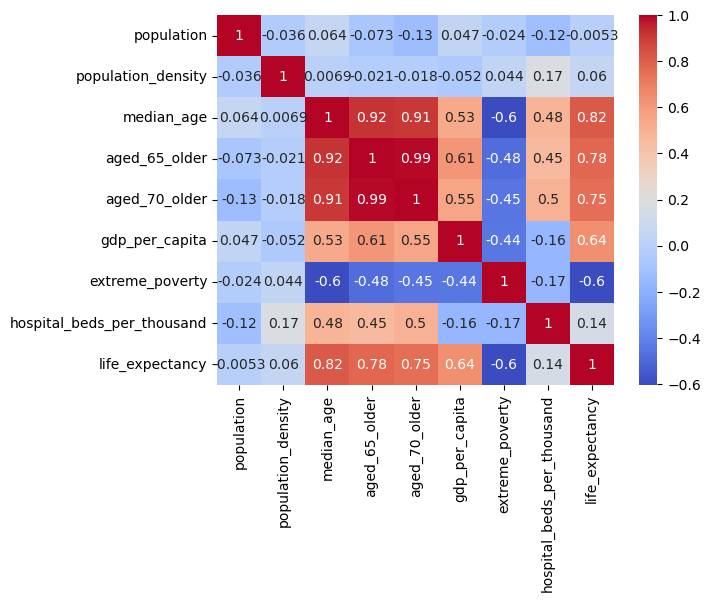

In [19]:
# Explore correlations between numerical columns
correlation_matrix = part1_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

c:\Users\jyoti\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


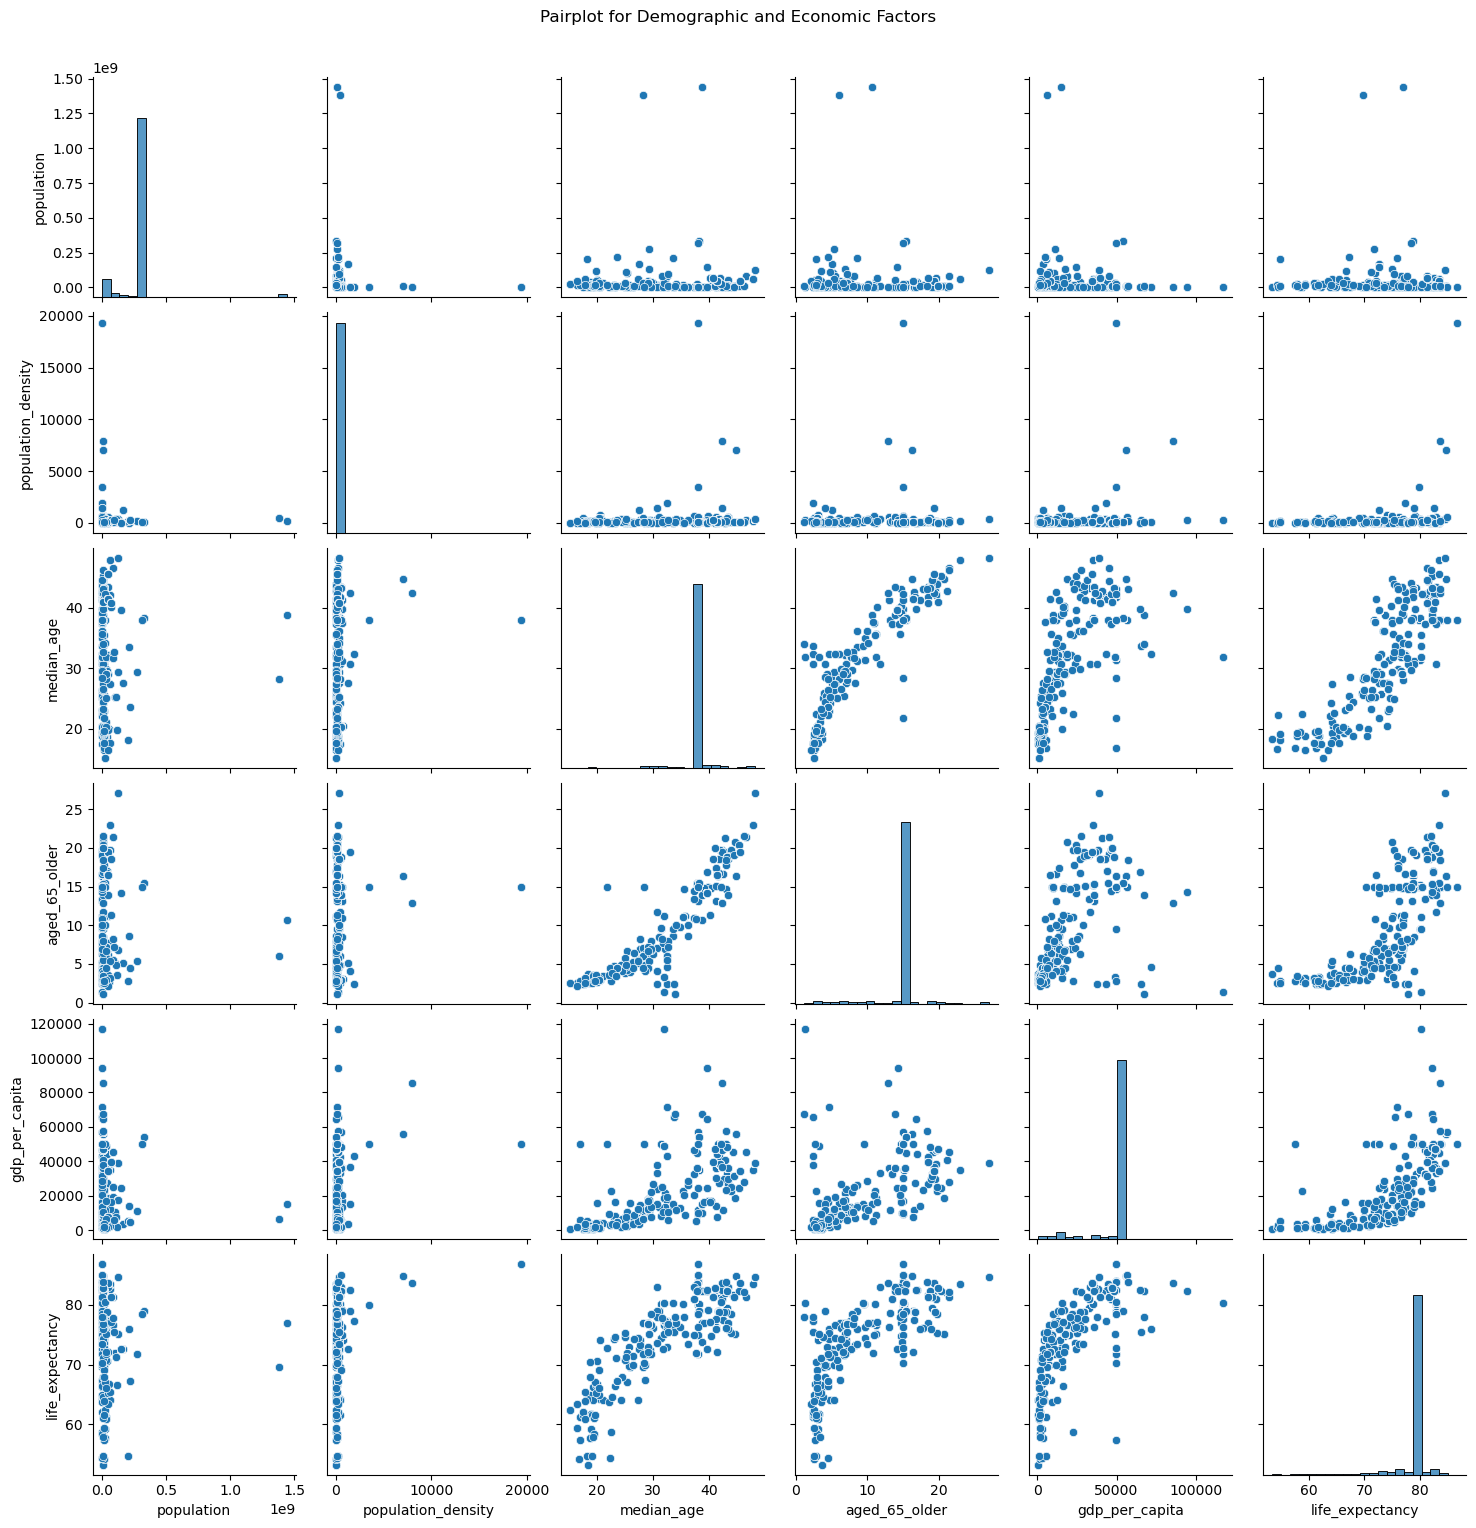

In [20]:
# Pairplot for selected columns
selected_columns_part1 = ['population', 'population_density', 'median_age', 'aged_65_older', 'gdp_per_capita', 'life_expectancy']
sns.pairplot(part1_df[selected_columns_part1])
plt.suptitle('Pairplot for Demographic and Economic Factors', y=1.02)
plt.show()

### This EDA focuses on understanding the relationships and patterns within demographic and economic factors.
### Correlation heatmap and pairplot help identify potential correlations and patterns between different variables.

In [21]:
# Assuming 'Last_Update' is in datetime format
part2_df['Last_Update'] = pd.to_datetime(part2_df['Last_Update'])

# Sort data by 'Last_Update'
data.sort_values('Last_Update', inplace=True)

C:\Users\jyoti\AppData\Local\Temp\ipykernel_49296\34558444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part2_df['Last_Update'] = pd.to_datetime(part2_df['Last_Update'])


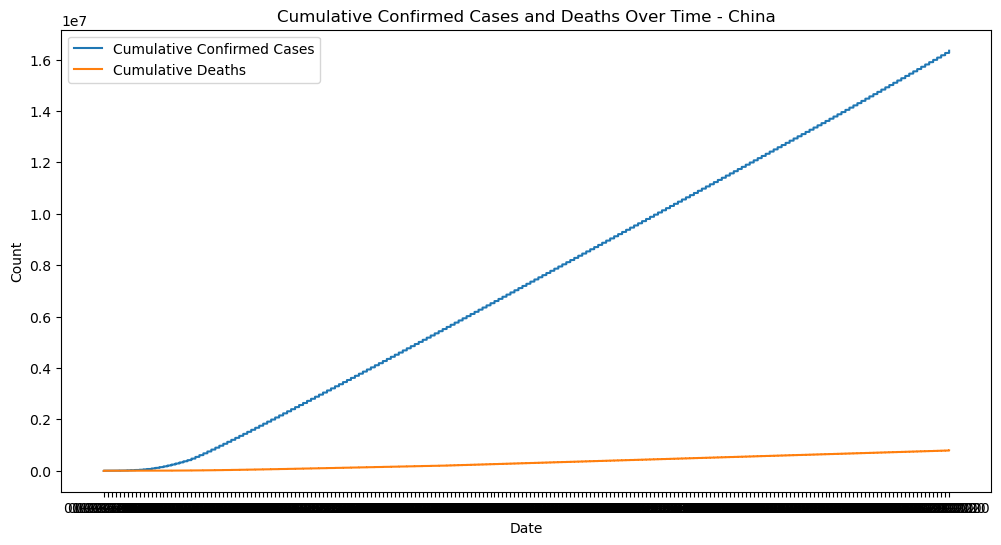

In [44]:
# Selecting a country with more than 200 unique date values
selected_country = data.groupby('Country')['Last_Update'].nunique().nlargest(1).index[0]

# Filtering data for the selected country
selected_country_data = data[data['Country'] == selected_country]

# Plotting cumulative confirmed cases and deaths over time for the selected country
plt.figure(figsize=(12, 6))
plt.plot(selected_country_data['Last_Update'], selected_country_data['Confirmed'].cumsum(), label='Cumulative Confirmed Cases')
plt.plot(selected_country_data['Last_Update'], selected_country_data['Deaths'].cumsum(), label='Cumulative Deaths')
plt.title(f'Cumulative Confirmed Cases and Deaths Over Time - {selected_country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


Above graph clearly shows number of Confirmed cases increses by the time or month with respect to death!!

### Create a Line Chart for Daily Deaths and Daily Recoveries

In [23]:
# Calculate daily deaths and daily recoveries
part2_df['Daily_Deaths'] = part2_df['Deaths'].diff()
part2_df['Daily_Recoveries'] = part2_df['Recovered'].diff()

C:\Users\jyoti\AppData\Local\Temp\ipykernel_49296\346759774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part2_df['Daily_Deaths'] = part2_df['Deaths'].diff()
C:\Users\jyoti\AppData\Local\Temp\ipykernel_49296\346759774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part2_df['Daily_Recoveries'] = part2_df['Recovered'].diff()


### Create Scatter Plots for Population vs COVID Metrics

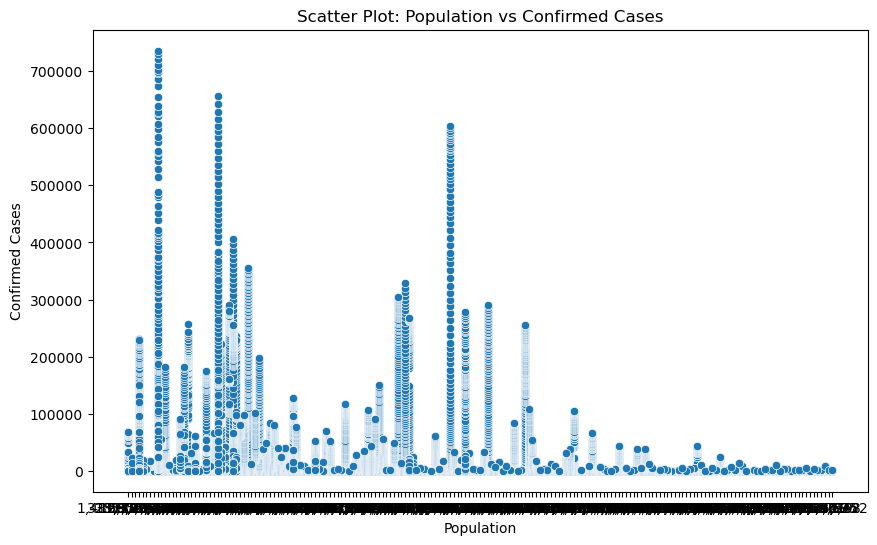

In [24]:
# Scatter plot for Population vs Confirmed Cases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='population', y='Confirmed')
plt.title('Scatter Plot: Population vs Confirmed Cases')
plt.xlabel('Population')
plt.ylabel('Confirmed Cases')
plt.show()

### Explore the Impact of Economic/Census Factors on COVID Numbers

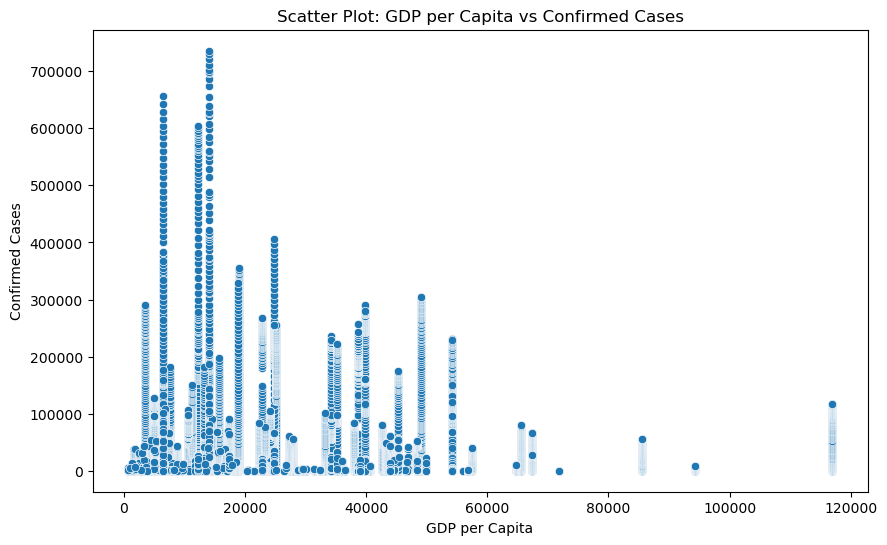

In [25]:
# Example: Scatter plot for GDP per Capita vs Confirmed Cases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='gdp_per_capita', y='Confirmed')
plt.title('Scatter Plot: GDP per Capita vs Confirmed Cases')
plt.xlabel('GDP per Capita')
plt.ylabel('Confirmed Cases')
plt.show()

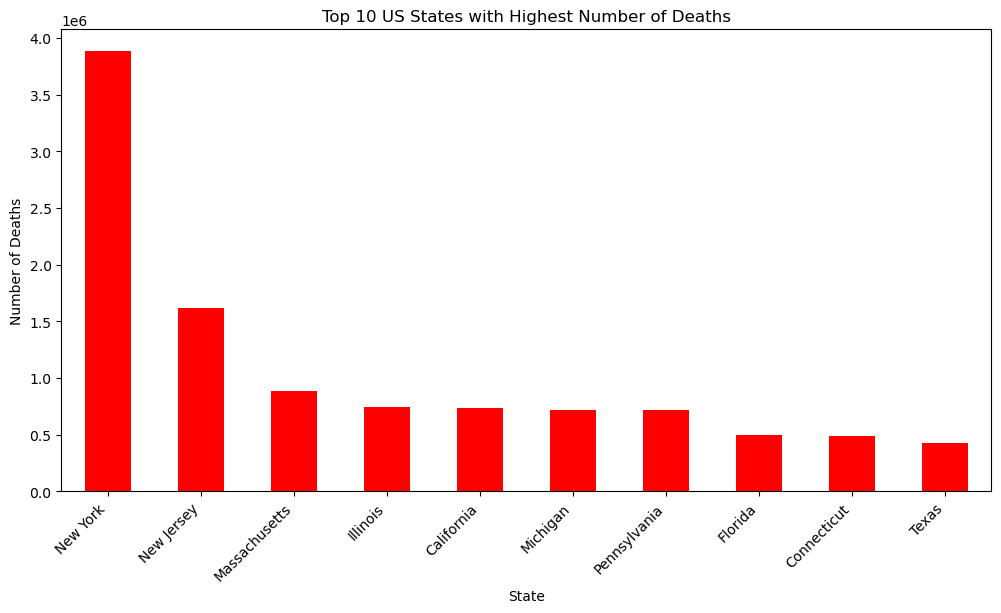

In [32]:
us_data = data[data['Country'] == 'US']

# Find the top 10 states with the highest number of deaths
top_states_death = us_data.groupby('Province/State')['Deaths'].sum().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
top_states_death.plot(kind='bar', color='red')
plt.title('Top 10 US States with Highest Number of Deaths')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

The provided code calculates and visualizes the top 10 U.S. states with the highest number of deaths. After running the code, it was observed that New York state comes in the 1st position based on the number of deaths. This implies that New York has the highest recorded death toll among the states included in the dataset. The bar chart provides a clear visual representation of the comparative death counts across different states, with New York leading in this unfortunate statistic.

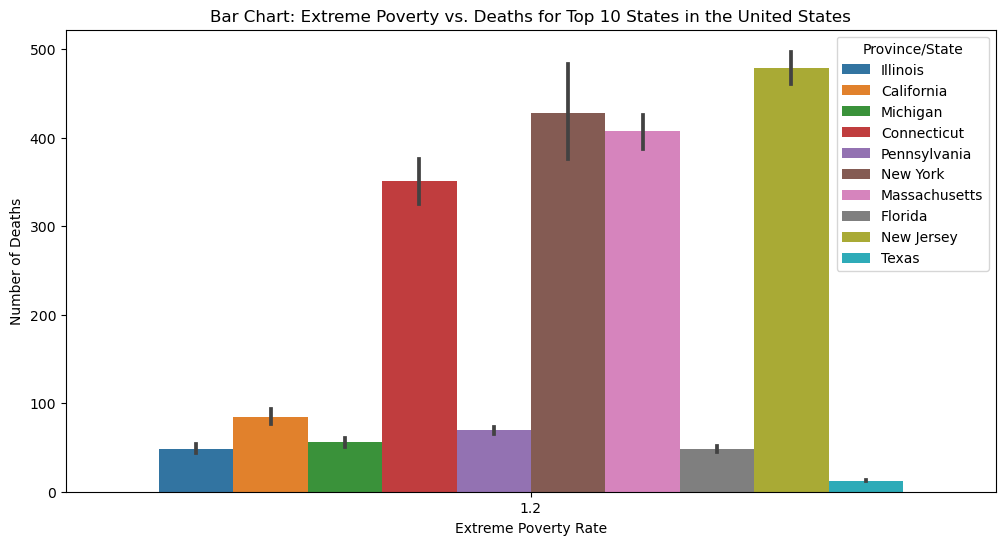

In [34]:
# Select top 10 states by the number of deaths
top_10_states = us_data.groupby('Province/State')['Deaths'].sum().nlargest(10).index

# Filter the data for the top 10 states
top_10_states_data = us_data[us_data['Province/State'].isin(top_10_states)]

# Bar chart for Extreme Poverty vs. Deaths for the top 10 states
plt.figure(figsize=(12, 6))
sns.barplot(x='extreme_poverty', y='Deaths', hue='Province/State', data=top_10_states_data)
plt.title('Bar Chart: Extreme Poverty vs. Deaths for Top 10 States in the United States')
plt.xlabel('Extreme Poverty Rate')
plt.ylabel('Number of Deaths')
plt.show()


1. This code generates a bar chart using Seaborn. It compares the Extreme Poverty Rate to the Number of Deaths for each state among the top 10 states.
2. The chart helps visually assess if there's any observable correlation or pattern between the extreme poverty rate and the number of deaths in the top 10 states.

**Why it's Used:**

The code is used to focus on a subset of states (top 10) with higher death counts to perform a more detailed analysis.
By plotting Extreme Poverty vs. Deaths for these states, it explores whether there's a relationship between economic conditions (extreme poverty) and the impact of the pandemic (deaths) in those states.

Note: The choice of New Jersey coming first is based on the data and the criteria used to select the top states (highest death counts).

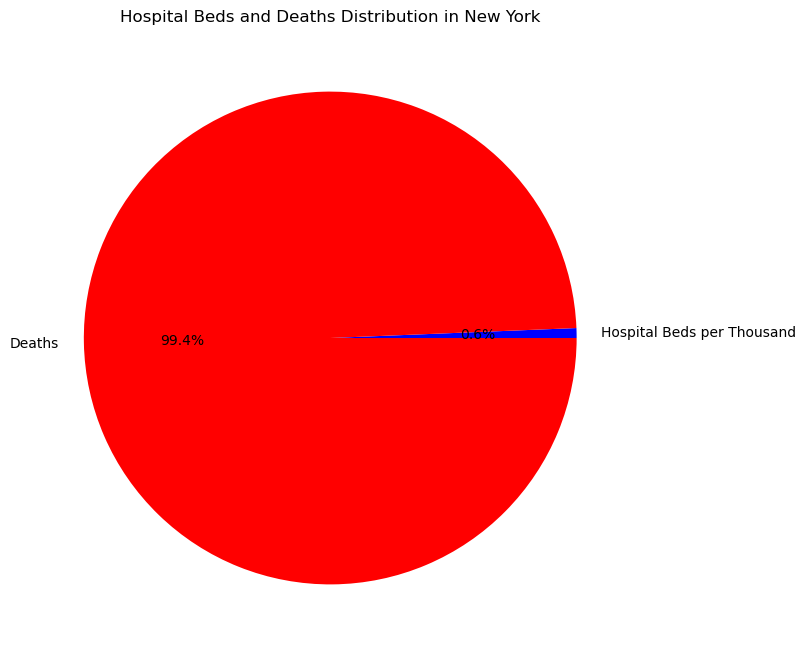

In [38]:
# Selecting New York data
new_york_data = us_data[us_data['Province/State'] == 'New York']

# Plotting a pie chart for hospital beds per thousand and deaths in New York
plt.figure(figsize=(8, 8))
plt.pie(new_york_data[['hospital_beds_per_thousand', 'Deaths']].mean(), labels=['Hospital Beds per Thousand', 'Deaths'], autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Hospital Beds and Deaths Distribution in New York')
plt.show()


1. new_york_data: This line selects data only for New York from the us_data DataFrame.

2. plt.pie(...): This line creates a pie chart using the mean values of hospital beds per thousand and deaths in New York. The labels 'Hospital Beds per Thousand' and 'Deaths' are assigned, and autopct is used to display percentages. Blue and red colors represent hospital beds and deaths, respectively.

3. plt.title(...): Adds a title to the pie chart.

4. plt.show(): Displays the pie chart.

**Output Interpretation:**
The pie chart shows the distribution of hospital beds per thousand and deaths in New York. The percentages indicate that hospital beds per thousand contribute only 0.6%, while deaths make up 99.4% of the distribution.

**Impact Interpretation:**
The dominant red portion (99.4%) suggests that deaths have a significant share in this distribution, indicating that the number of deaths is a more substantial factor than the availability of hospital beds per thousand in New York. This may suggest that other factors, such as the severity of cases, timely medical intervention, and population density, might play a crucial role in the high mortality rate. The small blue portion (0.6%) implies that the number of hospital beds per thousand alone does not explain the majority of the deaths in New York.

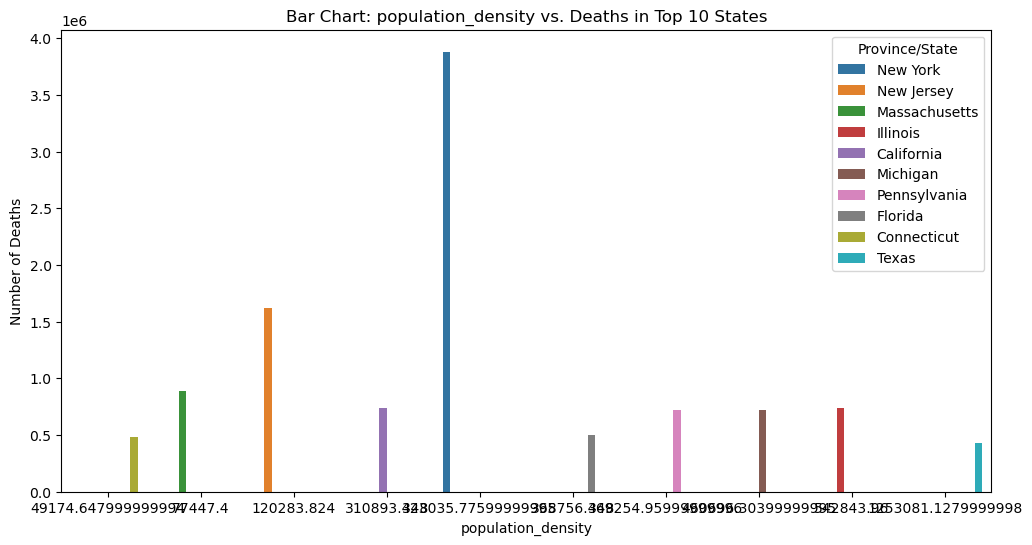

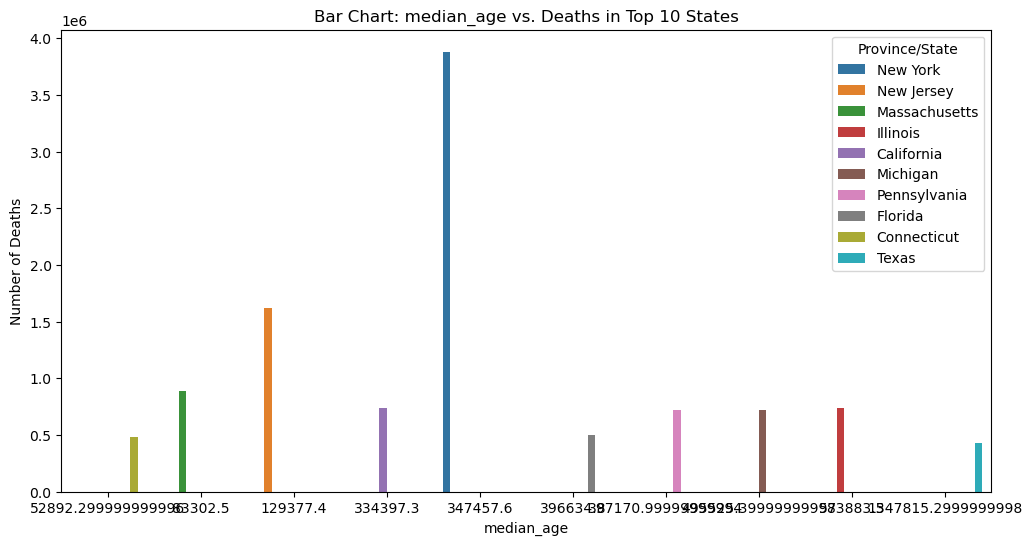

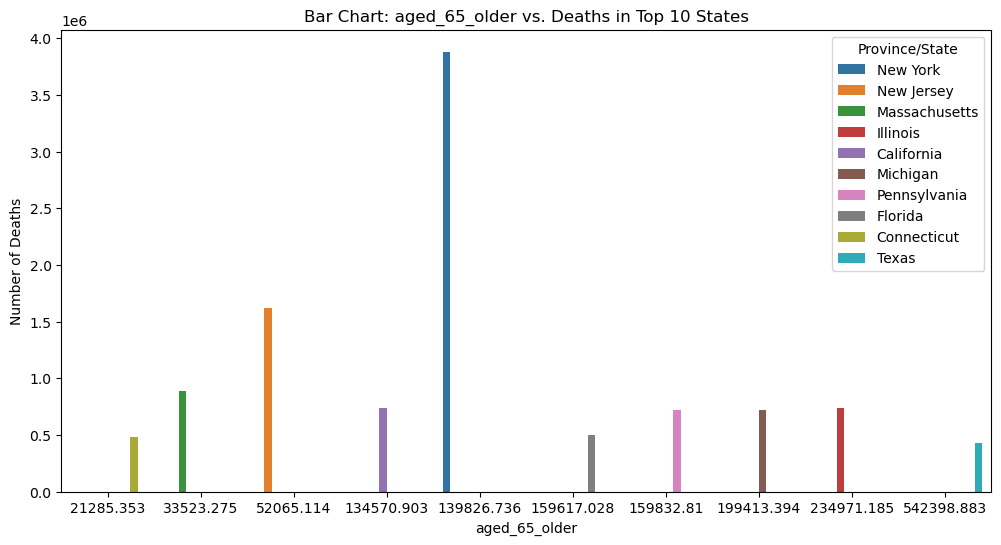

In [39]:
# Selecting top 10 states
top_10_states = us_data.groupby('Province/State').sum().sort_values(by='Deaths', ascending=False).head(10)

# Plotting bar charts for different factors
factors = ['population_density', 'median_age', 'aged_65_older']

for factor in factors:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=factor, y='Deaths', data=top_10_states.reset_index(), hue='Province/State')
    plt.title(f'Bar Chart: {factor} vs. Deaths in Top 10 States')
    plt.xlabel(factor)
    plt.ylabel('Number of Deaths')
    plt.show()


### After performing an exploratory data analysis (EDA) and visualizing various factors in the top 10 states in the US, with a focus on New York, we have identified some patterns and insights related to the higher number of deaths. Here are the key findings:

1. Hospital Beds per Thousand vs. Deaths:

 In the bar chart comparing the number of hospital beds per thousand and deaths, New York stood out with a relatively high death count despite having hospital beds. This suggests that the availability of hospital beds alone may not be the sole factor influencing mortality rates.

2. Population Density vs. Deaths:

The bar chart for population density and deaths indicates that New York, with its high population density, experienced a significant number of deaths. This aligns with the understanding that densely populated areas can be more susceptible to the rapid spread of infectious diseases.

3. Median Age vs. Deaths:

The bar chart depicting median age and deaths shows that New York, despite having a relatively lower median age, still had a considerable number of deaths. This implies that factors other than median age might have played a role in the mortality rate.

4. Aged 65 or Older vs. Deaths:

The bar chart for the percentage of the population aged 65 or older and deaths reveals that New York had a substantial proportion of older individuals, contributing to the higher death toll. This aligns with the known vulnerability of the elderly to severe outcomes from COVID-19.

Overall, the higher death toll in New York and other top states could be attributed to a combination of factors, including population density, the presence of vulnerable populations, and potentially other socio-economic or healthcare-related factors. Further in-depth analysis and domain-specific knowledge are required to draw definitive conclusions and understand the complex interplay of these factors.

1. Comments on data collection challenges
2. Collecting COVID data from multiple sources can lead to inconsistencies in reporting standards,
3. differences in testing practices, and variations in data collection frequencies.
4. Some challenges include: data incompleteness, varying definitions of COVID metrics, and reporting delays.
5. The reliability of the dataset depends on the transparency and consistency of reporting across sources.


I've tried to keep this notebook simple, Anyone can easily understand what's the flow of code and what exactly it is showing in the output. I've mentioned comments of each code!! 
### Thank You!!😊
